# Importing important libraries

In [1]:
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

# Loading Data and showing the Features

In [8]:
data_path="card_transdata.csv"
df=pd.read_csv(data_path)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [10]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isna().sum()
# The data has no null values which is good

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

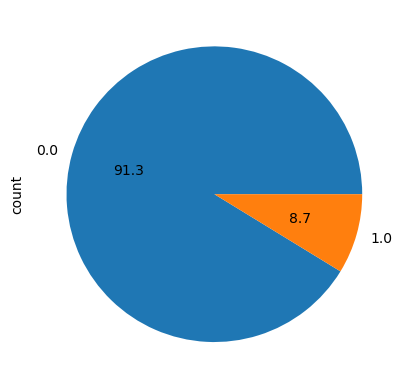

In [12]:
df.value_counts("fraud").plot.pie(autopct = "%.1f")
df['fraud'].value_counts()
# The data is imbalanced which we will be solved later

<Axes: >

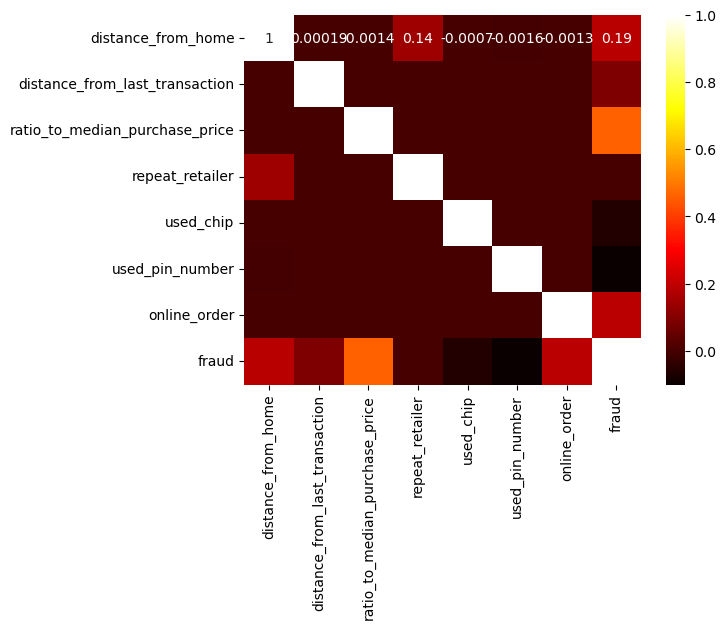

In [13]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='hot')
# showing The correlation between the multible features.

In [14]:
# Dealing with imbalanced data
real = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]

# Resampling the original dataset with 87,403 datapoints for both classes
real_resample = real.sample(n = 87403, random_state = 123)
fraud_resample = fraud.sample(n = 87403, random_state = 123)

# Creating new dataset consisting of equal class occurence 
df0 = pd.concat([real_resample, fraud_resample], axis = 0)

fraud
0.0    87403
1.0    87403
Name: count, dtype: int64

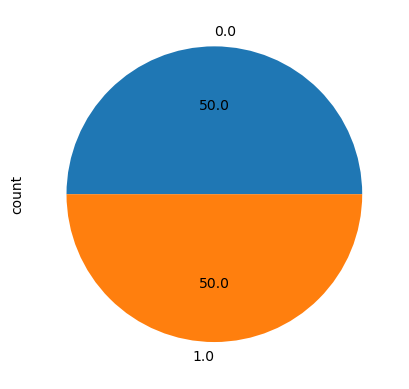

In [15]:
df0.value_counts("fraud").plot.pie(autopct = "%.1f")
df0['fraud'].value_counts()
# The data is imbalanced which we will be solved later

In [16]:
# Splitting the features and target
X = df0.drop(columns = "fraud")
y = df0["fraud"]

In [17]:
# Creating Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

In [18]:
# Data scaling to produce good results
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [19]:
dump(scale, 'scaler.joblib')

['scaler.joblib']

# KNN

In [31]:
# Empty lists for appending each value of k to choose best
train_accuracy = []
test_accuracy = []
# Iterate through values of k and store results
for k in range(3, 16):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

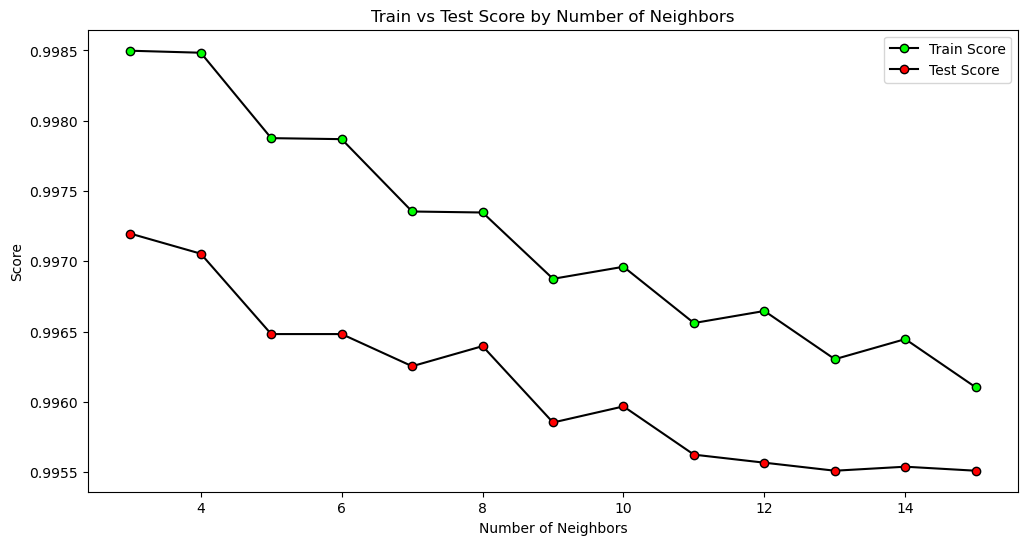

In [32]:
# Displaying model accuracy for different values of k
plt.figure(figsize = (12, 6))

plt.plot(range(3, 16), train_accuracy, label = "Train Score",marker = "o", markerfacecolor = "#00FF00", color = "#000000")

plt.plot(range(3, 16), test_accuracy, label = "Test Score", marker = "o", markerfacecolor = "#FF0000", color = "#000000")

plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Train vs Test Score by Number of Neighbors")
plt.legend()
plt.show()

In [33]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [34]:
accuracy = knn.score(X_test, y_test)
print("KNN Accuracy:",accuracy)
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.9971969566958412
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



In [35]:
precision_score(y_test, y_pred)

0.9951517225644536

Text(50.722222222222214, 0.5, 'Truth')

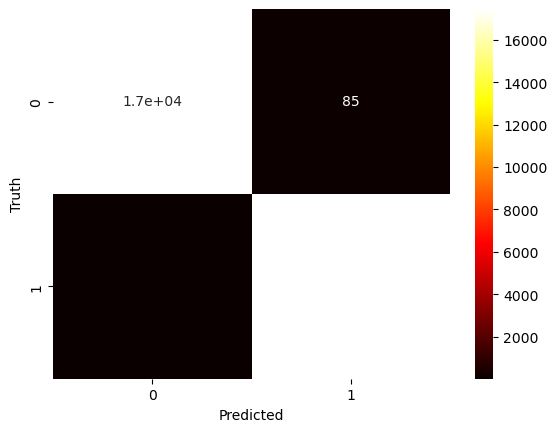

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "hot")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [37]:
rf = RandomForestClassifier(random_state = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [39]:
accuracy = rf.score(X_test, y_test)
print("RF Accuracy:",accuracy)
print(classification_report(y_test, y_pred))

RF Accuracy: 0.999942795034609
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



In [40]:
precision_score(y_test, y_pred)

0.9998854655824075

Text(120.72222222222221, 0.5, 'Truth')

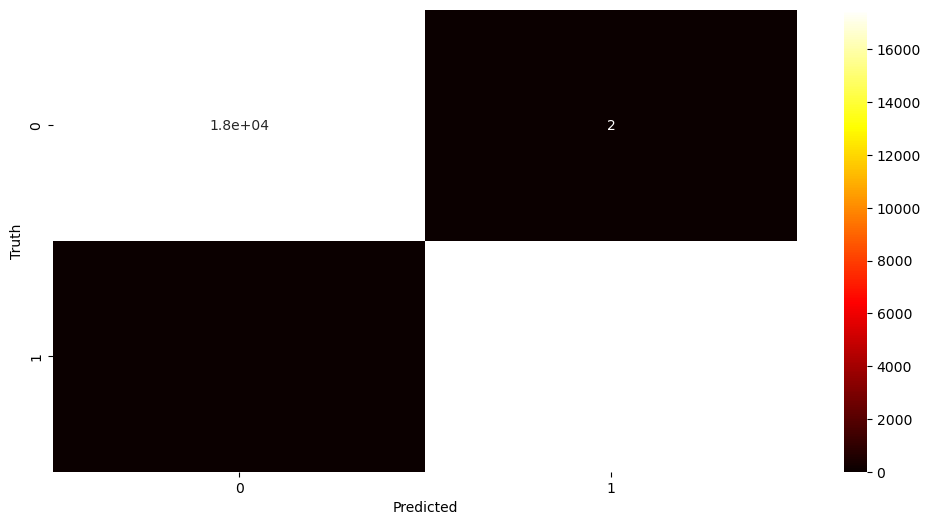

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "hot")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [42]:
# Save the model to a file
dump(rf, 'rf_model.joblib')

['rf_model.joblib']